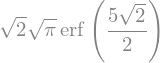

In [1]:
import sympy as sym

sym.init_printing()
X = sym.Symbol('X')
I_exacta = sym.integrate(2 * sym.exp(-X**2/2), (X, 0, 5))
I_exacta

In [2]:
I_ex_num = sym.N(I_exacta, 20)
I_ex_num

### Reglas de Newton-Cotes

In [3]:
import numpy as np

def f(x, A, µ):
    return A * np.exp(-µ * x**2)

In [4]:
a, b = 0, 5  # Intervalo de integración
A, µ = 2.0, 0.5 # Parámetros de la función f
n = 2**4 + 1 # número de abscisas (n = 17) con k = 4
x = np.linspace(a, b, n)
y = f(x, A, µ)

In [5]:
import operator
import scipy.integrate as spi

I_trap = spi.trapezoid(y, x=x)
I_simp = spi.simpson(y, x=x)
I_romb = spi.romb(y, dx=x[1]-x[0])
I_NC = [("Trapecio", I_trap), ("Simpson", I_simp), ("Romberg", I_romb)]
I_NC_errores = [(name, value, (value-I_ex_num) / I_ex_num * 100) for (name, value) in I_NC]
for name, value, error in sorted(I_NC_errores, key=operator.itemgetter(2), reverse=True):
    print(f'{name:10s}: {value} ({error:.3e} %)')

Simpson   : 2.5066268019880233 (-1.420e-6 %)
Trapecio  : 2.5066265447230225 (-1.168e-5 %)
Romberg   : 2.5065305814372403 (-3.840e-3 %)


### Integración con funciones evaluables

In [6]:
I_quad = spi.quad(f, a, b, args=(A, µ), full_output=1)
print(f'I = {I_quad[0]:.9f} ± {I_quad[1]:.3e} ( {(I_quad[0] - I_ex_num) /I_ex_num*100:.3e} % )')
print(f"Evaluaciones de f: {I_quad[2]['neval']}")

I = 2.506626838 ± 2.173e-09 ( 9.087e-15 % )
Evaluaciones de f: 21


In [7]:
I_fix_gauss = spi.fixed_quad(f, a, b, args=(A, µ), n=5)[0]
print(f'I = {I_fix_gauss:.9f} ( {(I_fix_gauss - I_ex_num)/I_ex_num * 100:.3e} % )')

I = 2.508871444 ( 8.955e-2 % )


In [8]:
I_gauss = spi.quad(f, a, b, args=(A, µ))[0]
print(f'I = {I_gauss:.9f} ( {(I_gauss - I_ex_num)/I_ex_num * 100:.3e} % )')

I = 2.506626838 ( 9.087e-15 % )


### Integral impropia

In [9]:
def f_imp(x):
    return np.exp(-x**2)
    
val, err = spi.quad(f_imp, -np.inf, np.inf)
print(f'{val = } ± {err}')

val = 1.7724538509055159 ± 1.4202636780944923e-08


### Integrales múltiples

In [10]:
def f2(x, y):
    return np.exp(-x**2 - y**2)

In [11]:
def g(x):
    return -1

def h(x):
    return 1
    
a, b = -1, 1
spi.dblquad(f2, a, b, g, h)

In [12]:
def f3(x, y, z):
    return np.exp(-x**2 - y**2 - z**2)

def q(x, y):
    return -1

def r(x, y):
    return 1
 
spi.tplquad(f3, a, b, g, h, q, r)

In [13]:
spi.nquad(f3, [(-1, 1), (-1, 1), (-1, 1)])

In [14]:
def fn(*args):
    """
    f(x1, x2, ..., x2) = exp(-x1^2 - x2^2 ... -xn^2)
    """
    return np.exp(-np.sum(np.array(args)**2))

In [15]:
%time spi.nquad(fn, [(-1, 1)] * 1) # Dimensión 1

CPU times: user 557 μs, sys: 0 ns, total: 557 μs
Wall time: 566 μs


In [16]:
%time spi.nquad(fn, [(-1, 1)] * 2) # Dimensión 2

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.66 ms


In [17]:
%time spi.nquad(fn, [(-1, 1)] * 3) # Dimensión 3

CPU times: user 47.6 ms, sys: 2.79 ms, total: 50.4 ms
Wall time: 48.8 ms


In [18]:
%time spi.nquad(fn, [(-1, 1)] * 4) # Dimensión 4

CPU times: user 649 ms, sys: 0 ns, total: 649 ms
Wall time: 648 ms


In [19]:
%time spi.nquad(fn, [(-1, 1)] * 5) # Dimensión 5

CPU times: user 13.1 s, sys: 0 ns, total: 13.1 s
Wall time: 13.1 s


### Integración múltiple con Monte Carlo

In [20]:
import vegas

integ = vegas.Integrator([[-1, 1]] * 5)
%time result = integ(fn, nitn=10, neval=1000)
print(result.summary())
print(f'I_MC = {result}')

CPU times: user 64.6 ms, sys: 0 ns, total: 64.6 ms
Wall time: 65.2 ms
itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   7.54(14)        7.54(14)            0.00     1.00
  2   7.41(10)        7.455(82)           0.63     0.43
  3   7.354(86)       7.407(59)           0.68     0.51
  4   7.439(63)       7.421(43)           0.50     0.69
  5   7.415(55)       7.419(34)           0.37     0.83
  6   7.501(43)       7.451(27)           0.75     0.59
  7   7.374(36)       7.424(21)           1.12     0.35
  8   7.488(28)       7.448(17)           1.44     0.18
  9   7.436(23)       7.443(14)           1.28     0.25
 10   7.428(19)       7.438(11)           1.19     0.30

I_MC = 7.438(11)



### Copyright 2020-2024 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

